In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Task 1: Familiarize yourself with the dataset 

In [3]:
# Load the Boston Housing dataset
url = 'C:\\Users\\dell\\Downloads\\boston_housing.csv'
boston_df = pd.read_csv(url)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### The following describes the dataset variables: · CRIM - per capita crime rate by town · ZN - proportion of residential land zoned for lots over 25,000 sq.ft. · INDUS - proportion of non-retail business acres per town. · CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) · NOX - nitric oxides concentration (parts per 10 million) · RM - average number of rooms per dwelling · AGE - proportion of owner-occupied units built prior to 1940 · DIS - weighted distances to five Boston employment centres · RAD - index of accessibility to radial highways · TAX - full-value property-tax rate per 10,000⋅PTRATIO−pupil−teacherratiobytown⋅LSTAT−⋅MEDV−Medianvalueofowner−occupiedhomesin 1000's

# Task 2: Generate basic statistics and visualizations for upper management. 

In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


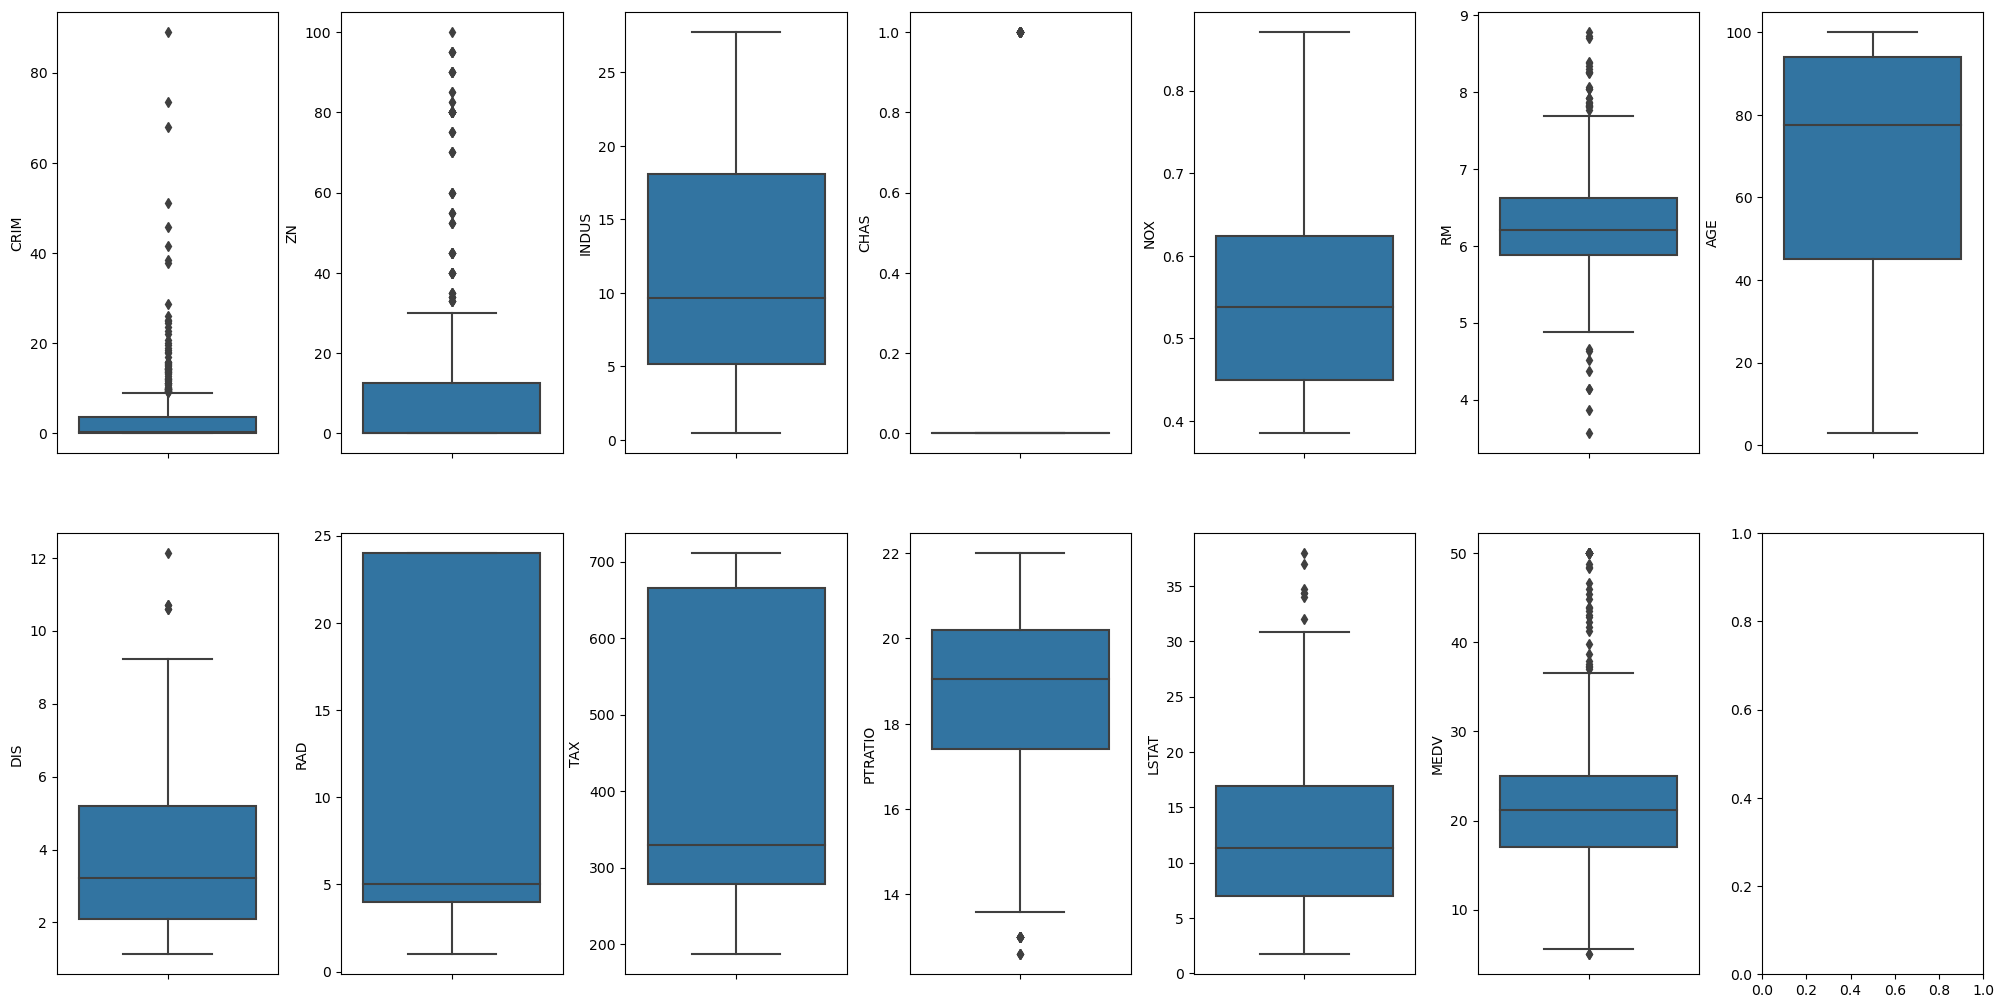

In [5]:
figs, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.boxplot(y=k, data=boston_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
for k, v in boston_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston_df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


# For the "Median value of owner-occupied homes" provide a boxplot

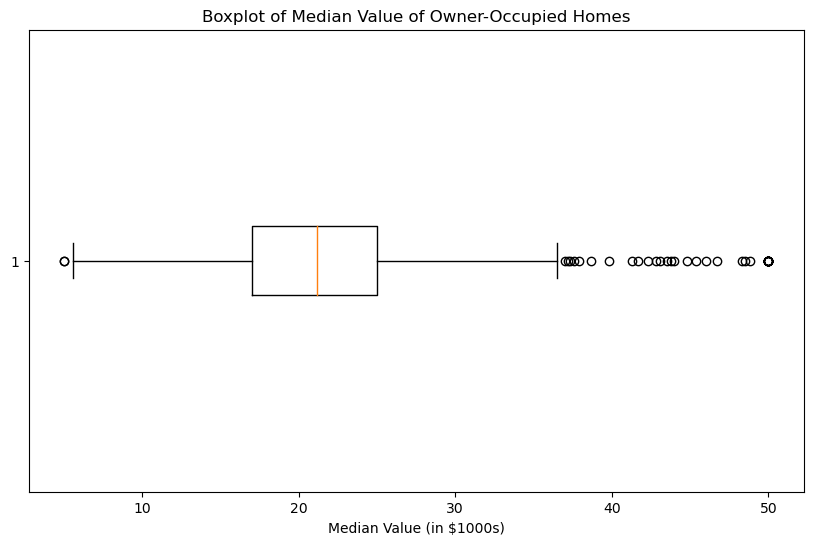

In [50]:
# Plot the boxplot for the "medv" column
plt.figure(figsize=(10, 6))
plt.boxplot(boston_df["MEDV"], vert=False)
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.xlabel("Median Value (in $1000s)")
plt.show()


# Provide a bar plot for the Charles river variable

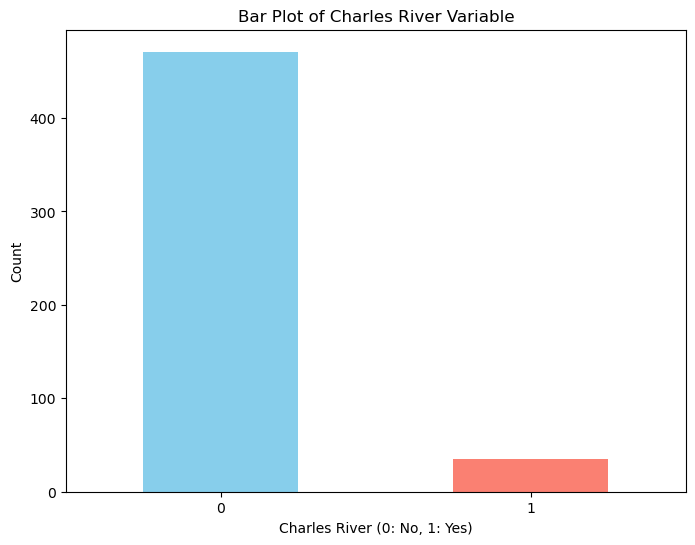

In [17]:
# Create a bar plot for the Charles river variable
chas_counts = boston_df['CHAS'].value_counts()

plt.figure(figsize=(8, 6))
chas_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

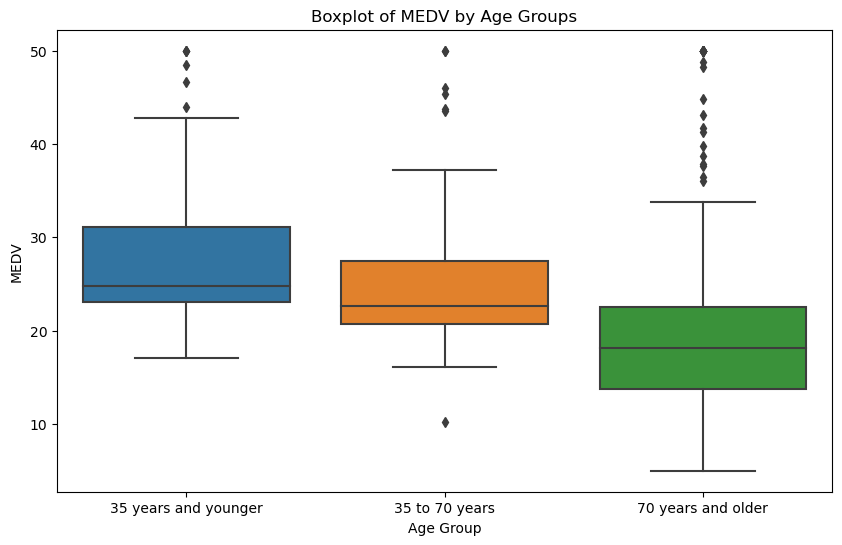

In [31]:

# Discretize the AGE variable
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

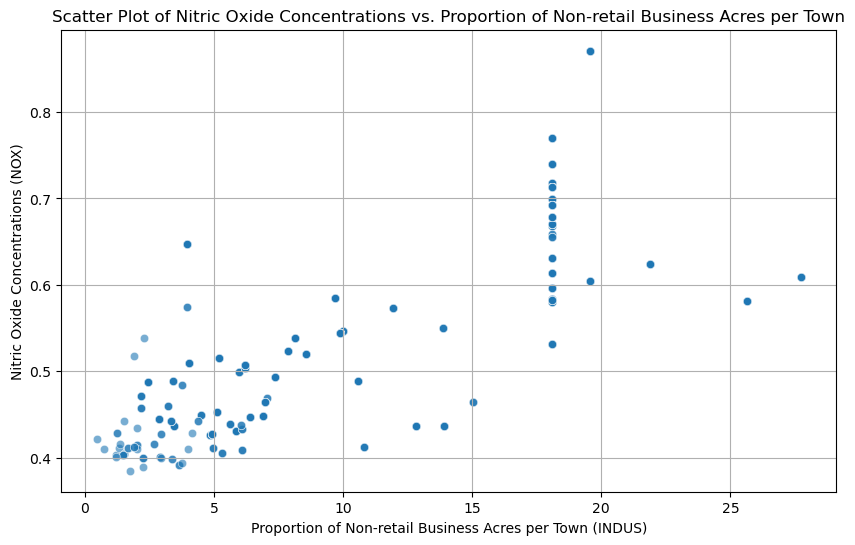

In [37]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(boston_df["INDUS"], boston_df['NOX'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-retail Business Acres per Town')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.grid(True)
plt.show()

### The correlation between nitric oxide concentrations and the percentage of non-retail business acres per town is displayed using a scatter plot. Generally, variable indus and nox have a positive correlation. This implies that the concentration of nitric oxide tends to increase along with the proportion of non-retail business acres. This relationship implies that higher concentrations of nitric oxide, a sign of air pollution, are found in areas with greater industrial activity. 

#  Create a histogram for the pupil to teacher ratio variable

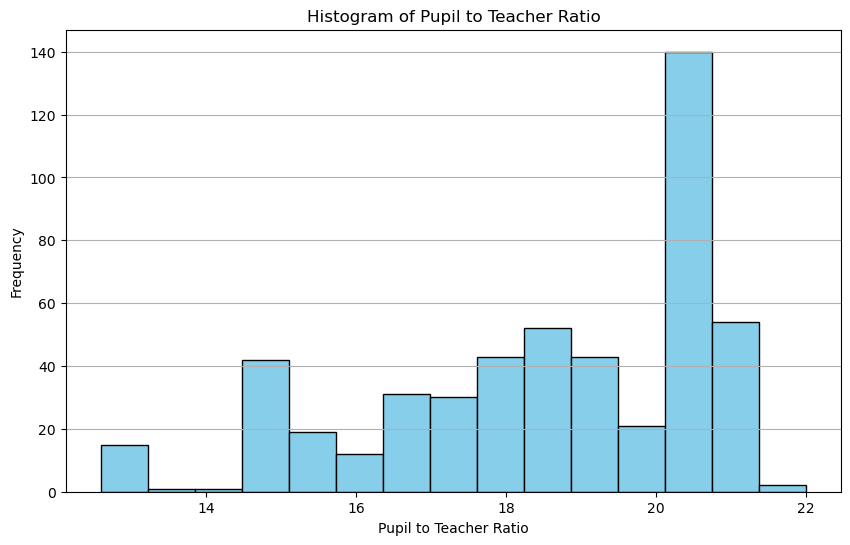

In [45]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.
### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [51]:
# Split the data into two groups
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)

# Print the test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Ch")

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles river.


#  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [52]:
# Check the column names to ensure MEDV is correctly named
print(boston_df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'age_group', 'AGE_group'],
      dtype='object')


In [55]:
# Perform ANOVA to test for differences in MEDV based on AGE
# Assuming AGE is treated as a categorical variable for this analysis
model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print('\nANOVA table:')
anova_table



ANOVA table:


,sum_sq,df,F,PR(>F)
C(AGE),29884.038419,355.0,0.984009,0.55397
Residual,12832.256996,150.0,NaN,NaN


#  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [57]:
# Calculate Pearson correlation coefficient between NOX and INDUS
pearson_corr = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')

# Print the correlation coefficient
print(f"Pearson Correlation Coefficient between NOX and INDUS: {pearson_corr}")

# Interpret the correlation coefficient
if abs(pearson_corr) < 0.1:
    print("There is no significant linear relationship between NOX and INDUS.")
else:
    if pearson_corr > 0:
        print("There is a positive linear relationship between NOX and INDUS.")
    else:
        print("There is a negative linear relationship between NOX and INDUS.")

Pearson Correlation Coefficient between NOX and INDUS: 0.7636514469209147
There is a positive linear relationship between NOX and INDUS.


# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [61]:
# Define the predictor (independent) variable and the response (dependent) variable
X = boston_df['DIS']  # Predictor variable (DIS)
y = boston_df['MEDV']  # Response variable (MEDV)

# Add a constant to the predictor variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Interpret the regression results
if model.pvalues['DIS'] < 0.05:
    coefficient = model.params['DIS']
    print(f"\nFor each additional unit of DIS, there is an estimated change of ${coefficient:.2f} in MEDV.")
    print("The relationship between DIS and MEDV is statistically significant.")
else:
    print("\nThe relationship between DIS and MEDV is not statistically significant.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        16:34:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0